# Python analytics crash course
We will explore the well known Titanic dataset and develop a classifier that predicts if an individual survivied the disaster.

Download the data from here: http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv

In [3]:
import pandas                     # Pandas is for data manipulation. Provides 'dataframes' like R.
import matplotlib.pyplot as plt   # Matplotlib is for plotting
%matplotlib inline                

Modify the following line to point to the location where you downloaded the data.

In [4]:
ti = pandas.read_csv("/Users/thomaskeefe/Downloads/titanic3.csv")

## Working with dataframes



In [5]:
type(ti)

pandas.core.frame.DataFrame

We see `ti` is an instance of a `DataFrame`. A dataframe is a matrix of data where each column can have its own datatype. For example, `age` is a number, and `cabin` is a string.

In [6]:
ti.head(10)   # View first 10 rows. Observe the "zero-indexing"

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [7]:
ti.describe()    # Summarize the numeric variables

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
ti.info()      # Get information on the datatypes in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


### Dealing with columns
Each column of the dataframe is a `Series`. A series has a set of keys (called an index) and their corresponding values. Series and DataFrames share many methods.

In [9]:
ages = ti['age']   # select a column
ages = ti.age      # same thing, but I prefer the first way

In [10]:
ages.head()        # index is 0, 1, 2, 3 etc.

0    29.00
1     0.92
2     2.00
3    30.00
4    25.00
Name: age, dtype: float64

In [11]:
ages[0]            # I can extract the value at key 0

29.0

In [12]:
ages.var()       # variance of ages

207.74878655136447

In [13]:
ages.var()**0.5  # standard deviation of ages

14.413493211271321

Practice deleting a column

In [60]:
del ti['body']

KeyError: 'body'

### Dealing with rows
Each row is also a Series, but instead of sharing the index of the parent Dataframe, a row is indexed by the columns of the Dataframe

In [14]:
first_passenger = ti.loc[0]   # use .loc to get a row

In [15]:
first_passenger

pclass                                   1
survived                                 1
name         Allen, Miss. Elisabeth Walton
sex                                 female
age                                     29
sibsp                                    0
parch                                    0
ticket                               24160
fare                               211.338
cabin                                   B5
embarked                                 S
boat                                     2
body                                   NaN
home.dest                     St Louis, MO
Name: 0, dtype: object

In [16]:
first_passenger['fare']     # Extract the value at key 'fare'

211.3375

### Subsetting

In [17]:
subset = ti[['pclass', 'survived', 'name']]  # subset columns
subset.head()

,pclass,survived,name
0,1,1,"Allen, Miss. Elisabeth Walton"
1,1,1,"Allison, Master. Hudson Trevor"
2,1,0,"Allison, Miss. Helen Loraine"
3,1,0,"Allison, Mr. Hudson Joshua Creighton"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"


In [18]:
subset = ti.loc[1:10]  # subset rows
subset = ti[1:10]      # same thing
subset

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [19]:
subset = ti.loc[1:10, ['pclass', 'survived', 'name']]   # both rows and cols
subset

,pclass,survived,name
1,1,1,"Allison, Master. Hudson Trevor"
2,1,0,"Allison, Miss. Helen Loraine"
3,1,0,"Allison, Mr. Hudson Joshua Creighton"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
5,1,1,"Anderson, Mr. Harry"
6,1,1,"Andrews, Miss. Kornelia Theodosia"
7,1,0,"Andrews, Mr. Thomas Jr"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)"
9,1,0,"Artagaveytia, Mr. Ramon"
10,1,0,"Astor, Col. John Jacob"


What are the indices of the survivors? (This is called a "mask")

In [20]:
ti['survived'] == 1

0        True
1        True
2       False
3       False
4       False
5        True
6        True
7       False
8        True
9       False
10      False
11       True
12       True
13       True
14       True
15      False
16      False
17       True
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25      False
26       True
27       True
28       True
29       True
        ...  
1279    False
1280    False
1281    False
1282    False
1283    False
1284    False
1285    False
1286     True
1287    False
1288    False
1289    False
1290     True
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
1299    False
1300     True
1301    False
1302    False
1303    False
1304    False
1305    False
1306    False
1307    False
1308    False
Name: survived, Length: 1309, dtype: bool

Use the mask to subset the people who survived

In [21]:
ti[ti['survived'] == 1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.00,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.00,0,0,19877,78.8500,NaN,S,6,NaN,NaN
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"


A more complicated subset

In [22]:
ti[(ti['fare'] >= 100) & ((ti['age'].between(18, 60) | ti['age'].isnull()))]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN
24,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN
28,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,8,NaN,NaN


We can build up this subset step by step to make it more manageable. This produces the same subset as above

In [23]:
mask_big_fare = ti['fare'] >= 100
mask_adults = ti['age'].between(18, 60)
mask_null_age = ti['age'].isnull()
combined_mask = mask_big_fare & (mask_adults | mask_null_age)
ti[combined_mask]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN
24,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN
28,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,8,NaN,NaN


Note that our subset is itself a dataframe.

Now a tour of some stuff we can calculate with it.

In [24]:
high_fare_adults = ti[combined_mask]

Means of each column (note, this object is a `Series`)

In [25]:
high_fare_adults.mean()

pclass        1.000000
survived      0.732394
age          37.204545
sibsp         0.633803
parch         0.690141
fare        196.169131
body        123.857143
dtype: float64

In [26]:
high_fare_adults.mean()['survived']

0.7323943661971831

In [27]:
high_fare_adults['survived'].mean()  # same thing.

0.7323943661971831

In [28]:
high_fare_adults.groupby('sex').mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,1.0,0.979167,36.622222,0.604167,0.666667,195.105294,NaN
male,1.0,0.217391,38.452381,0.695652,0.739130,198.389313,123.857143


In [29]:
high_fare_adults.groupby('sex')['survived'].mean()

sex
female    0.979167
male      0.217391
Name: survived, dtype: float64

## Plotting

/Users/thomaskeefe/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/thomaskeefe/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


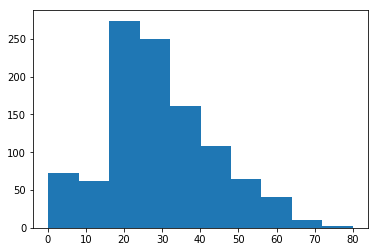

In [32]:
plt.hist(ti['age'])
plt.show()

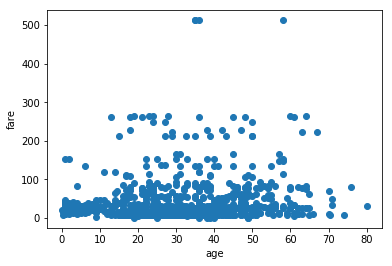

In [31]:
plt.scatter(ti['age'], ti['fare'])
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

In [34]:
first_class_fares = ti[ti['pclass']==1]['fare']
second_class_fares = ti[ti['pclass']==2]['fare']

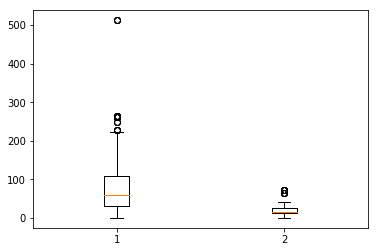

In [35]:
plt.boxplot([first_class_fares, second_class_fares])
plt.show()

### Programmatic plotting

In [36]:
for colname in ti.columns:
    print(colname)

pclass
survived
name
sex
age
sibsp
parch
ticket
fare
cabin
embarked
boat
body
home.dest


In [37]:
numeric_columns = ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']

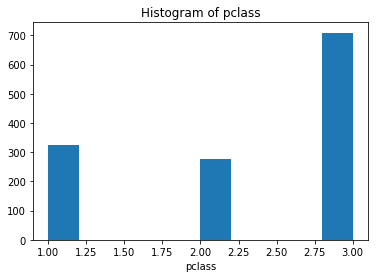

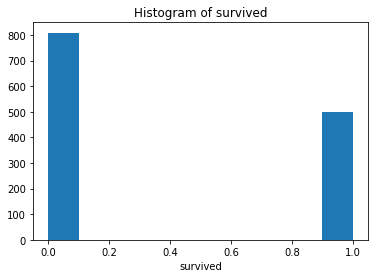

/Users/thomaskeefe/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/thomaskeefe/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


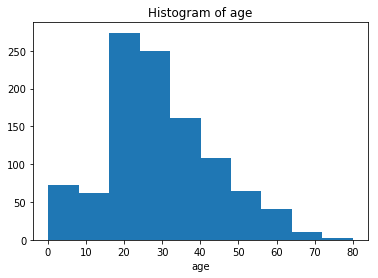

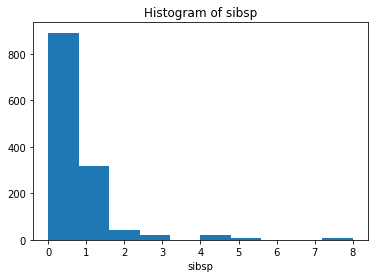

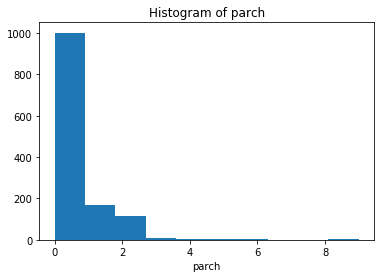

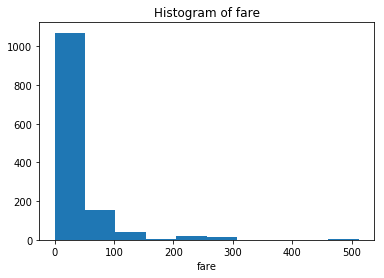

In [38]:
for colname in numeric_columns:
    column = ti[colname]
    fig = plt.figure()         # use plt.figure() to reset the plot for each iteration of the for loop
    plt.hist(column)
    plt.xlabel(colname)
    plt.title("Histogram of " + colname)
    plt.show()

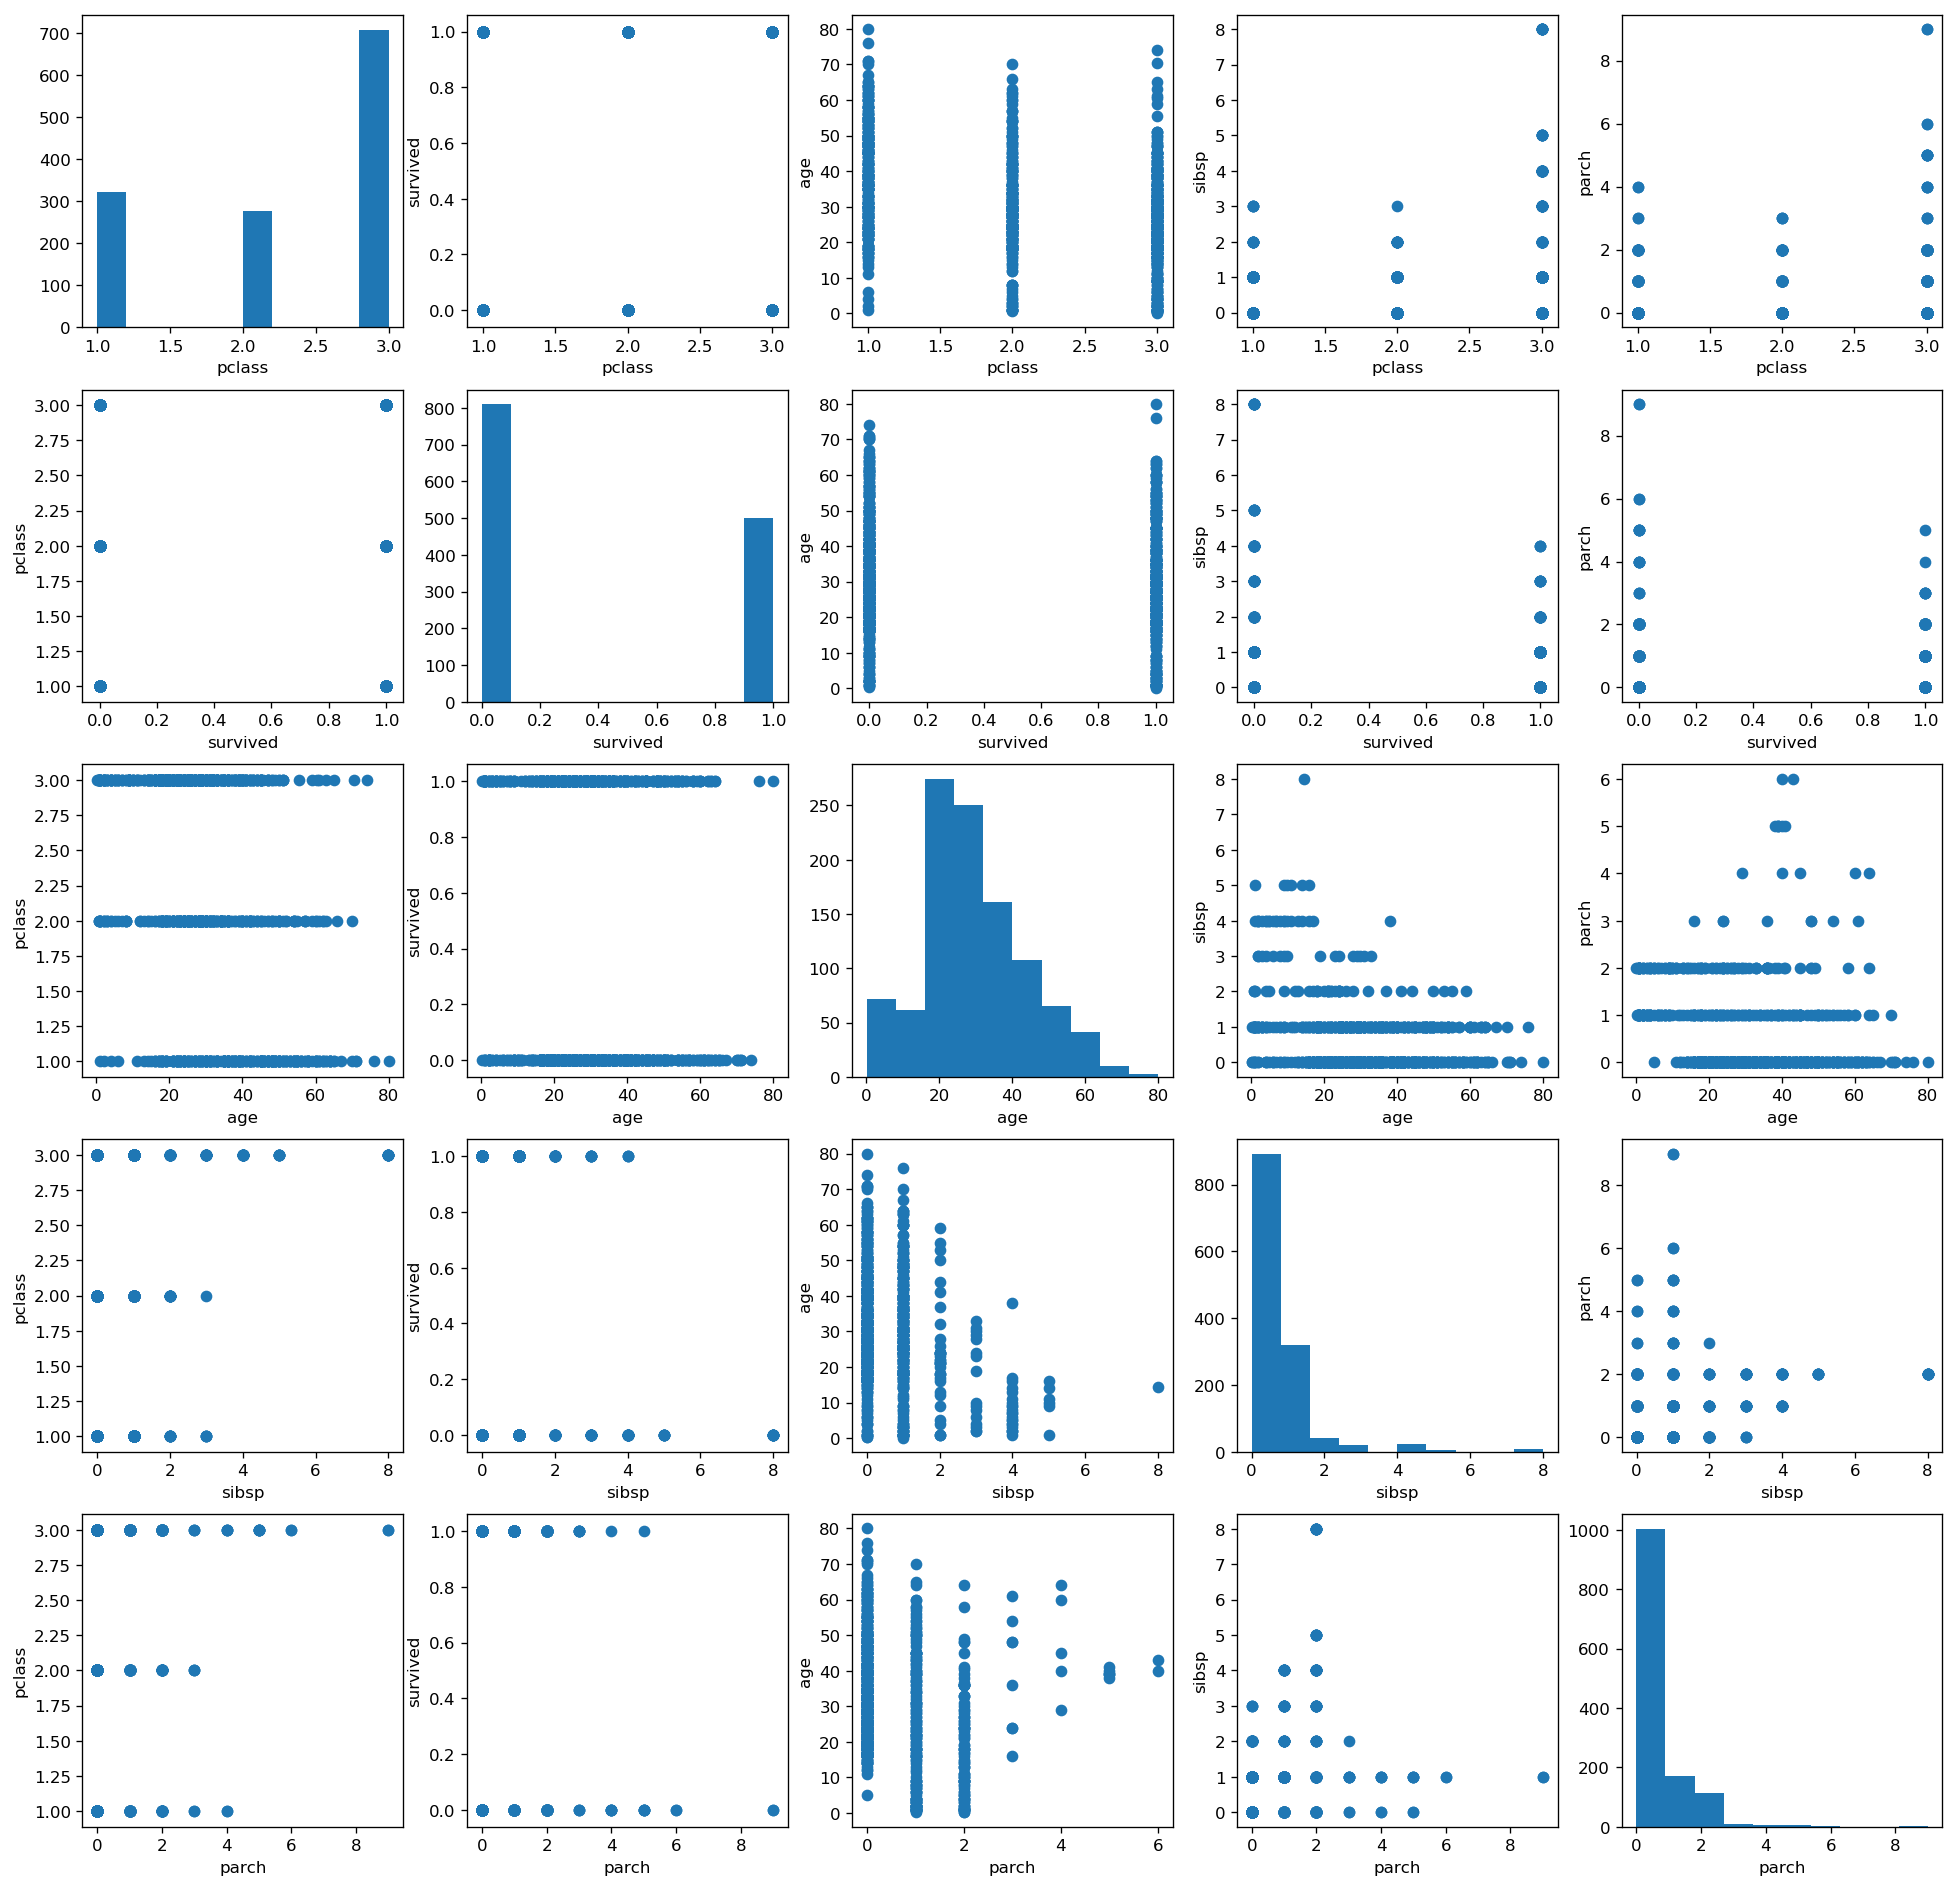

In [53]:
# Reset the plot and create a plot with 5 x 5 subplots
fig, axs = plt.subplots(5,5, figsize=(20, 20), dpi=120)

# For each pair of columns, make a scatter plot in the appropriate box
# and on the diagonal, put the histogram of that variable.

for i in range(0, 5):
    column_i_name = numeric_columns[i]
    for j in range(0, 5):
        column_j_name = numeric_columns[j]
        
        active_plot = axs[i,j]
        
        if i == j:
            active_plot.hist(ti[column_i_name])
            active_plot.set_xlabel(column_i_name)
            
        else:
            active_plot.scatter(ti[column_i_name], ti[column_j_name])
            active_plot.set_xlabel(column_i_name)
            active_plot.set_ylabel(column_j_name)

## Modeling
We'll try to write some classifiers to guess who survives

Simplest classifier: classify to the mean.

In [61]:
ti['survived'].mean()

0.3819709702062643

Fewer than half of the dataset survived, so my super simple classifier will simply predict everyone to die. How accurate would this classifier be?

Next simplest classifier: try to find a variable that does a decent job of separating living from dead.

In [62]:
males = ti.loc[ti['sex'] == 'male']

In [63]:
females = ti.loc[ti['sex'] == 'female']

In [64]:
ti['sex'].unique()

array(['female', 'male'], dtype=object)

In [65]:
males['survived'].mean()

0.19098457888493475

In [66]:
females['survived'].mean()

0.7274678111587983

In [67]:
females['survived'].sum()

339

In [68]:
len(ti)

1309

In [69]:
len(males) - males['survived'].sum()

682

In [90]:
(682 + 339)/1309

0.7799847211611918

So our expected accuracy with the male/female classifier is 78%. Can we beat this with a classifier that uses multiple variables simultaneously?

### Writing a logistic regression

We'll use a popular classification method called logistic regression. It requires variables to be numeric, so we will have to recode the sex variable as 0s and 1s.

In [70]:
def is_female(row):
    if (row['sex'] == 'female'):
        return 1
    else:
        return 0
    
ti['female'] = ti.apply(is_female, axis=1)

In [71]:
ti.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,female
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",1


In [72]:
# split into train and test
train = ti.sample(frac=.8)

In [73]:
test = ti.drop(train.index)

In [74]:
# make a list of the features to use
features_to_use = ['female', 'fare', 'age']
feature_matrix = train[features_to_use]
feature_matrix.head()

,female,fare,age
358,1,13.0000,42.0
438,1,65.0000,24.0
794,1,12.4750,5.0
589,1,23.0000,29.0
848,0,14.1083,41.0


In [75]:
from sklearn import linear_model

In [76]:
lr_model = linear_model.LogisticRegression()

In [77]:
lr_model.fit(feature_matrix, train['survived'])

/Users/thomaskeefe/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 1272 to 266
Data columns (total 15 columns):
pclass       1047 non-null int64
survived     1047 non-null int64
name         1047 non-null object
sex          1047 non-null object
age          828 non-null float64
sibsp        1047 non-null int64
parch        1047 non-null int64
ticket       1047 non-null object
fare         1046 non-null float64
cabin        229 non-null object
embarked     1047 non-null object
boat         386 non-null object
body         95 non-null float64
home.dest    597 non-null object
female       1047 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 130.9+ KB


In [109]:
train.loc[train['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,female
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,0


Since this is just one person, we'll drop it from the training set.

In [87]:
train = train.drop(1225)

To deal with null ages, we'll replace them by the mean age.

In [88]:
avg_age = ti['age'].mean()
avg_age

29.881137667304014

In [89]:
def new_age(row):
    age = row['age']
    if pandas.isnull(age):
        return avg_age
    else:
        return age    

In [90]:
train['new_age'] = train.apply(new_age, axis=1)
test['new_age'] = test.apply(new_age, axis=1)

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 358 to 0
Data columns (total 15 columns):
pclass       1046 non-null int64
survived     1046 non-null int64
name         1046 non-null object
sex          1046 non-null object
age          844 non-null float64
sibsp        1046 non-null int64
parch        1046 non-null int64
ticket       1046 non-null object
fare         1046 non-null float64
cabin        243 non-null object
embarked     1044 non-null object
boat         387 non-null object
home.dest    605 non-null object
female       1046 non-null int64
new_age      1046 non-null float64
dtypes: float64(3), int64(5), object(7)
memory usage: 130.8+ KB


In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 1 to 1299
Data columns (total 15 columns):
pclass       262 non-null int64
survived     262 non-null int64
name         262 non-null object
sex          262 non-null object
age          201 non-null float64
sibsp        262 non-null int64
parch        262 non-null int64
ticket       262 non-null object
fare         262 non-null float64
cabin        52 non-null object
embarked     262 non-null object
boat         99 non-null object
home.dest    140 non-null object
female       262 non-null int64
new_age      262 non-null float64
dtypes: float64(3), int64(5), object(7)
memory usage: 32.8+ KB


In [93]:
predictors = ['female', 'fare', 'new_age']
train[predictors].head()

,female,fare,new_age
358,1,13.0000,42.0
438,1,65.0000,24.0
794,1,12.4750,5.0
589,1,23.0000,29.0
848,0,14.1083,41.0


In [94]:
lr_model.fit(train[predictors], train['survived'])

/Users/thomaskeefe/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
predictions = lr_model.predict(test[predictors])

In [150]:
sum(predictions==test['survived'])/len(test)

0.767175572519084